In [1]:
import numpy as np
import scipy.linalg as la
import control as ct
import matplotlib.pyplot as plt

In [17]:
# Definisikan matriks A, B, C, dan D
A = np.array([[1, 4],
              [2, 5]])
B = np.array([[1],
              [0]])
C = np.array([[4, 0],
              [0, 1]])
D = np.array([[0]])

# Menghitung nilai eigen
eigenvalues, _ = la.eig(A)
print("Eigenvalues of the system:", eigenvalues)

#mengecek poles
sys_ss = ct.ss(A, B, C, 0)
poles = ct.poles(sys_ss)
print("poles = ", poles)

# Mengecek Kestabilan Sistem
is_stable = all(np.real(eigenvalues) < 0)
print("System is asymptotically stable:", is_stable)

# Matriks Keterkendalian
Q = ct.ctrb(A, B)
R = np.linalg.matrix_rank(Q)
print("Controllability matrix Q:\n", Q)
print("Rank of the controllability matrix Q:", R)


Eigenvalues of the system: [-0.46410162+0.j  6.46410162+0.j]
poles =  [-0.46410162+0.j  6.46410162+0.j]
System is asymptotically stable: False
Controllability matrix Q:
 [[1. 1.]
 [0. 2.]]
Rank of the controllability matrix Q: 2


In [18]:
P = [-2 + 1j, -2 - 1j,]
P1 = [-5j, 5j]
P2 = [1 + 2j, 1 - 2j]

K = ct.place(A, B, P)
K1 = ct.place(A, B, P1)
K2 = ct.place(A, B, P2)
print("State Feedback K :\n", K)
print("State Feedback K1 :\n", K1)
print("State Feedback K2 :\n", K2)
print("\n")

A_new = A - B @ K
A_new1 = A - B @ K1
A_new2 = A - B @ K2
eigenvalues_new, _ = la.eig(A_new)
eigenvalues_new1, _ = la.eig(A_new1)
eigenvalues_new2, _ = la.eig(A_new2)

print("Nilai eigen dari A_new :\n", eigenvalues_new)
print("Nilai eigen dari A_new1 :\n", eigenvalues_new1)
print("Nilai eigen dari A_new2 :\n", eigenvalues_new2)

State Feedback K :
 [[10. 29.]]
State Feedback K1 :
 [[ 6. 29.]]
State Feedback K2 :
 [[ 4. 14.]]


Nilai eigen dari A_new :
 [-2.+1.j -2.-1.j]
Nilai eigen dari A_new1 :
 [1.66533454e-16+5.j 1.66533454e-16-5.j]
Nilai eigen dari A_new2 :
 [1.+2.j 1.-2.j]


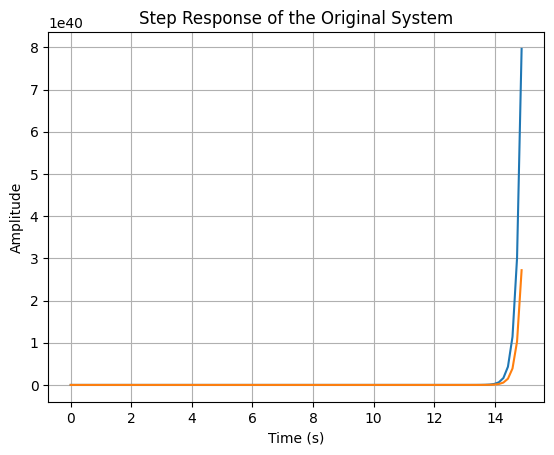

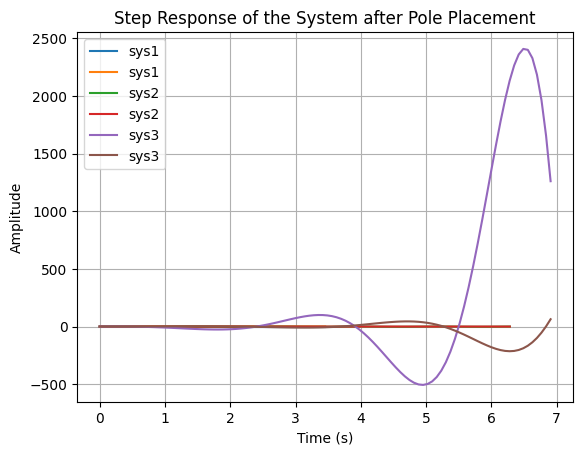

In [ ]:
# Plot step response of the original system
sys = ct.ss(A, B, C, 0)
t, y = ct.step_response(sys)
y = np.squeeze(y)
plt.figure()
plt.plot(t, y.T)
plt.title("Step Response of the Original System")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Plot step response of the system after pole placement
sys_fb = ct.ss(A_new, B, C, 0)
sys_fb1 = ct.ss(A_new1, B, C, 0)
sys_fb2 = ct.ss(A_new2, B, C, 0)
t, y = ct.step_response(sys_fb)
t1, y1 = ct.step_response(sys_fb1)
t2, y2 = ct.step_response(sys_fb2)
y = np.squeeze(y)
y1 = np.squeeze(y1)
y2 = np.squeeze(y2)
plt.figure()
plt.plot(t, y.T)
plt.plot(t1, y1.T)
plt.plot(t2, y2.T)
plt.title("Step Response of the System after Pole Placement")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

NOMOR 2

In [2]:
A2= np.array([[-10, 0, 0, 0, 2],
             [0, 0, 0, 0, 0], 
             [-10.5229, -1066.67, -3.38028, 23.5107, 0],
             [0, 339.804, 3.125, -46.5107, 0],
             [0, 0, 10, 10, -10]]) 
B2= np.array([[5],
              [0],
              [0],
              [0],
              [0]])

eig_val2, _ = la.eig(A2)
print("Eigenvalues of the system:", eig_val2)

Eigenvalues of the system: [ -3.77256593+3.64675708j  -3.77256593-3.64675708j
 -14.1987649 +0.j         -48.14708324+0.j
   0.        +0.j        ]


In [5]:
real_eig1= np.real(eig_val2) <0
is_stable2= np.all(real_eig1)
print("System is asymptotically stable:", is_stable2)

System is asymptotically stable: False


In [6]:
C_matrix = ct.ctrb(A2, B2)
rank_C = np.linalg.matrix_rank(C_matrix)
control = rank_C == A2.shape[0]
print("rank Q :",rank_C)
print ("Apakah sistem dapat dikendalikan?:", "Ya" if control else "Tidak")

rank Q : 4
Apakah sistem dapat dikendalikan?: Tidak


In [16]:
pole1, pole2 = -3 + 3j, -3 - 3j
pole3, pole4, pole5 = -60, -80, -100
desired_poles = np.array([pole1, pole2, pole3, pole4, pole5])
K21= ct.place(A2, B2, desired_poles)

# Compute closed-loop system matrix
A_closed_loop = A2 - B2 @ K21
eigenvalues_closed_loop, _ = la.eig(A_closed_loop)
print("Nilai eigen dari A_closed_loop:\n", eigenvalues_closed_loop)
for i, eigen in enumerate(eigenvalues_closed_loop):
    print(f"Pole {i+1}: {eigen}")

Nilai eigen dari A_closed_loop:
 [  46.10902484+0.j -100.        +0.j  -80.        +0.j  -60.        +0.j
    0.        +0.j]
Pole 1: (46.10902483882647+0j)
Pole 2: (-100.00000000000128+0j)
Pole 3: (-80.00000000000274+0j)
Pole 4: (-59.99999999999948+0j)
Pole 5: 0j


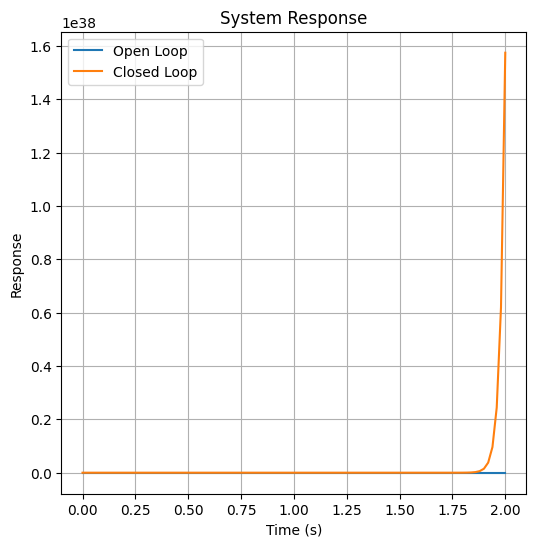

In [14]:
# Create state-space system
sys_open_loop = ct.ss(A2, B2, np.eye(5), np.zeros((5, 1)))
sys_closed_loop = ct.ss(A_closed_loop, B2, np.eye(5), np.zeros((5, 1)))

# Time vector
time = np.linspace(0, 2, 100)

# Step response
t_open, y_open = ct.step_response(sys_open_loop, T=time)
t_closed, y_closed = ct.step_response(sys_closed_loop, T=time)

y_open = np.squeeze(y_open)
y_closed = np.squeeze(y_closed)

# Plot response
plt.figure(figsize=(6, 6))
plt.plot(t_open, y_open[0], label="Open Loop")
plt.plot(t_closed, y_closed[0], label="Closed Loop")
plt.legend(["Open Loop", "Closed Loop"])
plt.title("System Response")
plt.xlabel("Time (s)")
plt.ylabel("Response")
plt.grid()
plt.show()